

## Document-image binarization using modified Sauvola's algorithm

This binarization technique is an improvement over Sauvola's binarization technique. In this work, we improve the existing Sauvola's binarization technique by preserving more foreground information in the binarized document-images. In order to achieve this, we introduce a confidence score for the background pixels. 


In Sauvola's algorithm, a threshold is computed for each pixel using the Eq $\ref{eq:sauvola}$, where, for an input image $I$,  $R=\frac{\textrm{max}(I) - \textrm{min}(I)}{2}$. 
\begin{equation}
T_W (p)= m_{W}^{p} \times [1+k\times (\frac{s_{W}^{p}}{R} - 1)]
\label{eq:sauvola} \tag{1}
\end{equation}
The threshold $T$ is computed for each pixel ($p$) based on a window $W$ of size $n \times n$ surrounding it, where $m_{W}^{p}, s_{W}^{p}$ respectively represent mean and standard deviation of $W$ around pixel $p$, and  $k$ lies between $0 \le k \le 1$. 

We define a confidence value, $C$, for each pixel $p$ as Eq \ref{eq:conf}, where max($I$) represent maximum value of any pixel of an input image $I$.
\begin{equation}
  C_W(p)  = \left\{
  \begin{array}{l l}
    \frac{I(p) - T_W(p)}{\textrm{max}(I) - T_W(p)} & \quad \textrm{if \textit{$I(p)$} $>$ \textit{$T_W(p)$}}\\
    0 & \quad  \textrm{otherwise}\\
  \end{array} \right.
\label{eq:conf} \tag{2}
\end{equation} 


A new image $I_{c}$ corresponding to an input image $I$ is generated using the confidence value given by the  Eq $\ref{eq:conf}$. Later, Eq $\ref{eq:sauvola}$ is used to compute thresholds for the image $I_c$. These thresholds are further used to generate the new binary image. 

For details refer to this [paper](https://drive.google.com/file/d/1D3CyI5vtodPJeZaD2UV5wdcaIMtkBbdZ/view?usp=sharing)

This notebook provides an example of how to utilize modified sauvola algorithm for image binarization task.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
import ModifiedSauvola_Binarization as MSB

# Sample Usage

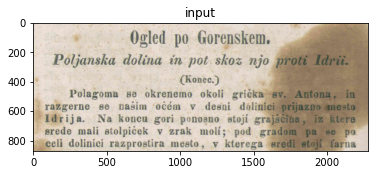

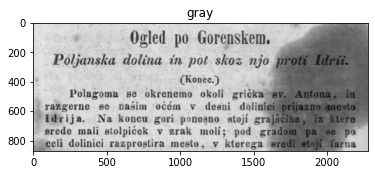

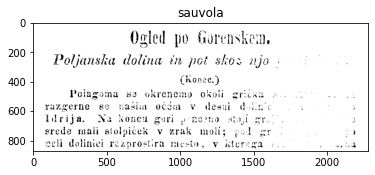

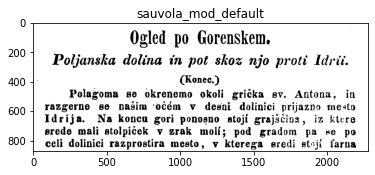

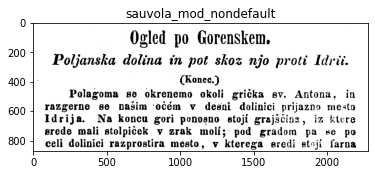

In [2]:

filename = "test_images/image_165.png"
in_color = cv2.imread(filename,1)

plt.imshow(cv2.cvtColor(in_color, cv2.COLOR_BGR2RGB))
plt.title('input')
plt.show()

##########################################################################################
# Executing Sauvola for binarization

win_size = int(0.05*min(in_color.shape[0],in_color.shape[1]))
if (win_size%2==0):
    win_size = win_size + 1
k = 0.5
gray = cv2.cvtColor(in_color, cv2.COLOR_BGR2GRAY)
T = threshold_sauvola(gray, window_size=win_size,k=k)
binary = np.copy(gray)
binary[gray <= T] = 0
binary[gray > T] = 255

plt.imshow(gray,cmap = 'gray')
plt.title('gray')
plt.show()

plt.imshow(binary,cmap = 'gray')
plt.title('sauvola')
plt.show()
##########################################################################################
# Executing modified sauvola for binarization using deafult parameters

binary_default = MSB.SauvolaModBinarization(in_color)

plt.imshow(binary_default,cmap = 'gray')
plt.title('sauvola_mod_default')
plt.show()

##########################################################################################
# Executing modified sauvola for binarization using custom parameters

k1=0.5
k2=0.5
n1 = int(0.04*min(in_color.shape[0],in_color.shape[1]))
if (n1%2==0):
    n1 = n1+1
n2 = int(0.09*min(in_color.shape[0],in_color.shape[1]))
if (n2%2==0):
    n2 = n2+1
binary_nondefault = MSB.SauvolaModBinarization(in_color,n1,n2,k1,k2,default=False)


plt.imshow(binary_nondefault,cmap = 'gray')
plt.title('sauvola_mod_nondefault')
plt.show()

##########################################################################################